In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**Membaca Data**

In [3]:
data = pd.read_csv('/content/gdrive/My Drive/Dataset/netflix_titles.csv')

In [4]:
data.shape

(7787, 12)

In [5]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Membuat kolom baru yaitu kolom Tahun dan Bulan**


In [6]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month

In [7]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0


# **Content Types**

Text(0.5, 1.0, 'Content Type on Netflix')

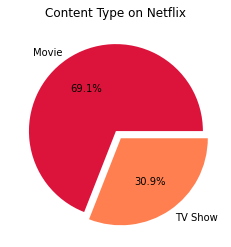

In [9]:
show_type = data['type'].value_counts().to_dict()

labels = []
value = []
colors = ["crimson", "coral"]
for key, items in show_type.items():
  labels.append(key)
  value.append(items)

plt.pie(value, labels=labels, colors=colors, autopct='%1.1f%%', explode=(0, 0.1))
plt.title("Content Type on Netflix")

Visualisasi di atas menunjukkan bahwa sebagian besar (69.1%) tipe konten yang ada pada Netflix berupa Film atau Movie

# **Rating**

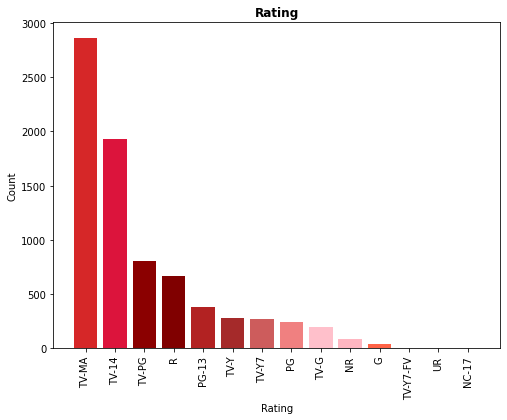

In [10]:
rating = data['rating'].value_counts()
colors = ['tab:red', 'crimson', 'darkred', 'maroon','firebrick','brown','indianred','lightcoral','pink','lightpink','tomato','darksalmon','coral','lightsalmon']

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(rating.index, rating.values, color=colors)
plt.xticks(rotation=90)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Rating', fontsize=12, fontweight='bold')

plt.show()

1. Sebagian besar konten yang ada di Netflix merupakan **'TV-MA'** rating."TV-MA" merupakan rating yang dibuat oleh TV Parental Guidelines kepada program yang ditujukan untuk penoton dewasa.

2. Jenis konten kedua terbesar adalah **'TV-14'** yang mnunjukkan bahwa program tidak cocok ditonton oleh anak-anak yang berusia dibawah 14 tahun

3. Dan rating terbesar ketiga adalah **'TV-PG'**. PG merupakan Parental Guidance yang menunjukkan bahwa program bisa ditonton oleh anak-anak dengan pendampingan orang dewasa
Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

# **Top 10 Genre**

[('International Movies', 2437), ('Dramas', 2106), ('Comedies', 1471), ('International TV Shows', 1199), ('Documentaries', 786), ('Action & Adventure', 721), ('TV Dramas', 704), ('Independent Movies', 673), ('Children & Family Movies', 532), ('Romantic Movies', 531)]


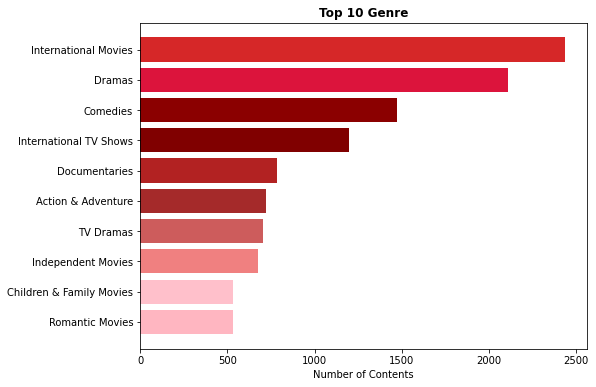

In [82]:
from collections import Counter

genre = ', '.join(data['listed_in']).split(', ')
count = Counter(genre).most_common(10)
genre_content = [x[0] for x in count]
genre_count = [x[1] for x in count]

print(count)
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(genre_content, genre_count, color=colors)
ax.set_yticks(genre_content)
ax.set_yticklabels(genre_content)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Contents')
ax.set_title('Top 10 Genre', fontsize=12, fontweight='bold')

plt.show()

International Movies dengan jumlah 2437 merupakan genre konten yang paling banyak di Netflix diikuti oleh genre Drama sejumlah 2106 konten dan Komedi sejumlah 1471 konten

# **Top 10 Countries with Most Content**

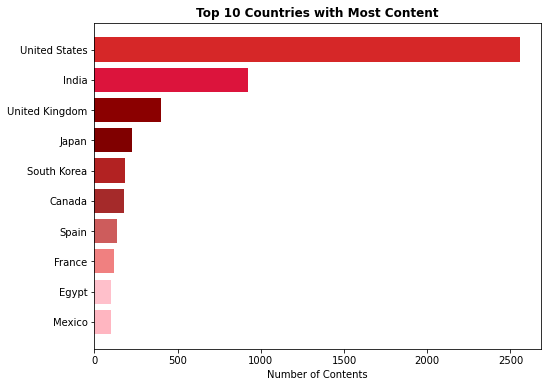

In [11]:
countries = data['country'].value_counts()
top_countries = countries[:10]
colors = ['tab:red', 'crimson', 'darkred', 'maroon','firebrick','brown','indianred','lightcoral','pink','lightpink']

fig, ax = plt.subplots(figsize=(8,6))
ax.barh(top_countries.index, top_countries.values, color=colors)
ax.set_yticks(top_countries.index)
ax.set_yticklabels(top_countries.index)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Contents')
ax.set_title('Top 10 Countries with Most Content', fontsize=12, fontweight='bold')

plt.show()

Dilihat dari grafik, dapat ditarik kesimpulan bahwa Amerika Serikat merupakan negara yang menghasilkan konten Netflix terbanyak

# **Number of Content Added per Year**

In [32]:
tv_data = data[data['type'] == "TV Show"]
tv_data_year = tv_data['year'].value_counts().reset_index()
tv_data_year = tv_data_year.rename(columns = {"year": "count", "index": "year"})
tv_data_year = tv_data_year.sort_values('year')
tv_data_year_count = tv_data_year['count'].to_list()[:-1]
tv_year = tv_data_year['year'].to_list()[:-1]

len(tv_data_year_count), len(tv_year)

(9, 9)

In [33]:
movie_data = data[data['type'] == "Movie"]
movie_data_year = movie_data['year'].value_counts().reset_index()
movie_data_year = movie_data_year.rename(columns = {"year": "count", "index": "year"})
movie_data_year = movie_data_year.sort_values('year')
movie_data_year_count = movie_data_year['count'].to_list()[:-1]
movie_year = movie_data_year['year'].to_list()[:-1]

len(movie_data_year_count), len(movie_year)

(13, 13)

Text(0.5, 0, 'Year')

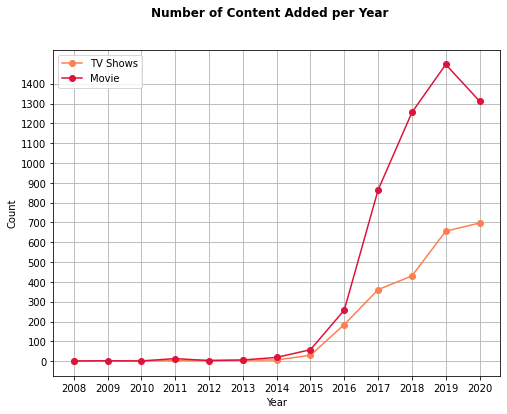

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('Number of Content Added per Year', fontsize=12, fontweight='bold')

ax.plot(tv_year, tv_data_year_count,'-o', color="coral", label='TV Shows')
ax.plot(movie_year, movie_data_year_count, 'o-', color="crimson", label='Movie')
plt.legend(loc='upper left');
plt.grid()
plt.yticks(np.arange(0, max(movie_data_year_count), 100))
plt.xticks(np.arange(2008, 2021, 1))
ax.set_ylabel('Count')
ax.set_xlabel('Year')



1.   Jumlah konten mengalami kenaikan drastis di tahun 2017
2.   Pada tahun 2020, jumlah konten berupa Movie mencapai 2 kali lipat konten berupa TV Shows



# **Number of Content Released per Month**

In [43]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['month'] = data['date_added'].dt.month
data['year'] = data['date_added'].dt.year
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

movie_data = data[data['type'] == "Movie"]
movie_data_month = movie_data.groupby('year')['month'].value_counts().unstack(level=0).fillna(0)
movie_data_month = movie_data_month.sort_values('month')
i=0
for index in movie_data_month.index:
  movie_data_month.rename(index={index:month_order[i]},inplace=True)
  i+=1

movie_data_month

year,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
month,,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,15.0,58.0,108.0,123.0,164.0,88.0
February,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,9.0,66.0,64.0,113.0,71.0,0.0
March,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,102.0,137.0,119.0,96.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,14.0,66.0,87.0,121.0,130.0,0.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,9.0,63.0,73.0,110.0,109.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,11.0,65.0,50.0,127.0,119.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,19.0,46.0,127.0,102.0,103.0,0.0
August,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,24.0,77.0,135.0,92.0,83.0,0.0
September,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6.0,29.0,86.0,83.0,92.0,116.0,0.0


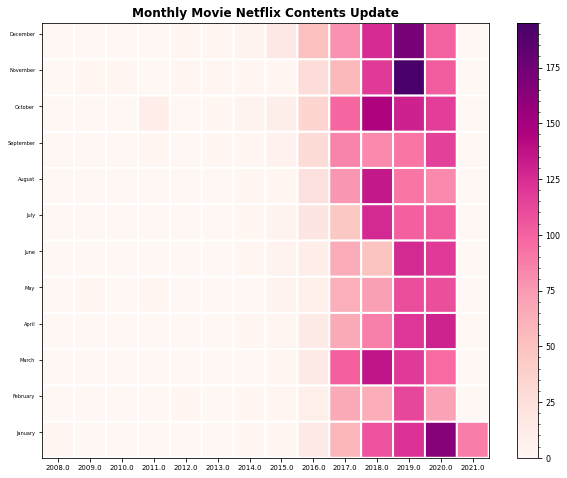

In [44]:
plt.figure(figsize=(10,8))
plt.pcolor(movie_data_month, cmap='RdPu', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(movie_data_month.columns), 1), movie_data_month.columns, fontsize=7)
plt.yticks(np.arange(0.7, len(movie_data_month.index), 1), movie_data_month.index, fontsize=5)
plt.title('Monthly Movie Netflix Contents Update', fontsize=12, fontweight='bold',)
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

Pada tahun 2019, bulan **November** merupakan bulan dengan jumlah konten ***Movie*** terupload yang **paling banyak**. Pada bulan lain, jumlah konten relatif lebih sedikit dibandingkan bulan November

In [46]:
tv_data = data[data['type'] == "TV Show"]
tv_data_month = tv_data.groupby('year')['month'].value_counts().unstack(level=0).fillna(0)
tv_data_month = tv_data_month.sort_values('month')
i=0
for index in tv_data_month.index:
  tv_data_month.rename(index={index:month_order[i]},inplace=True)
  i+=1

tv_data_month

year,2008.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
month,,,,,,,,,,
January,0.0,0.0,0.0,0.0,29.0,14.0,22.0,39.0,64.0,29.0
February,1.0,0.0,1.0,1.0,7.0,18.0,24.0,46.0,46.0,0.0
March,0.0,1.0,0.0,2.0,3.0,38.0,38.0,60.0,56.0,0.0
April,0.0,0.0,1.0,4.0,8.0,29.0,31.0,50.0,58.0,0.0
May,0.0,0.0,0.0,2.0,4.0,25.0,28.0,49.0,64.0,0.0
June,0.0,0.0,0.0,3.0,8.0,30.0,28.0,48.0,48.0,0.0
July,0.0,0.0,0.0,3.0,10.0,34.0,30.0,67.0,53.0,0.0
August,0.0,1.0,0.0,0.0,17.0,38.0,34.0,53.0,61.0,0.0
September,0.0,1.0,0.0,1.0,19.0,33.0,44.0,44.0,62.0,0.0


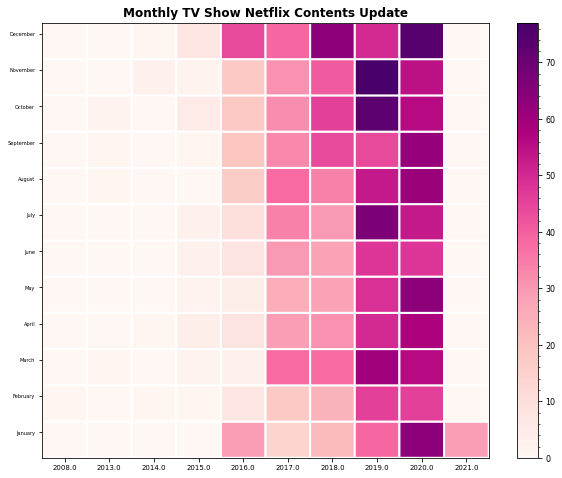

In [47]:
plt.figure(figsize=(10,8))
plt.pcolor(tv_data_month, cmap='RdPu', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(tv_data_month.columns), 1), tv_data_month.columns, fontsize=7)
plt.yticks(np.arange(0.7, len(tv_data_month.index), 1), tv_data_month.index, fontsize=5)
plt.title('Monthly TV Show Netflix Contents Update', fontsize=12, fontweight='bold',)
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

Pada tahun 2019, bulan **November** dan **Oktober** merupakan bulan dengan jumlah konten ***TV Show*** terupload yang **paling banyak**. Pada bulan lain, jumlah konten relatif lebih sedikit dibandingkan bulan November dan Oktober

# **Movie Duration**

['United States', 'India', 'United Kingdom', 'Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Egypt', 'Mexico']


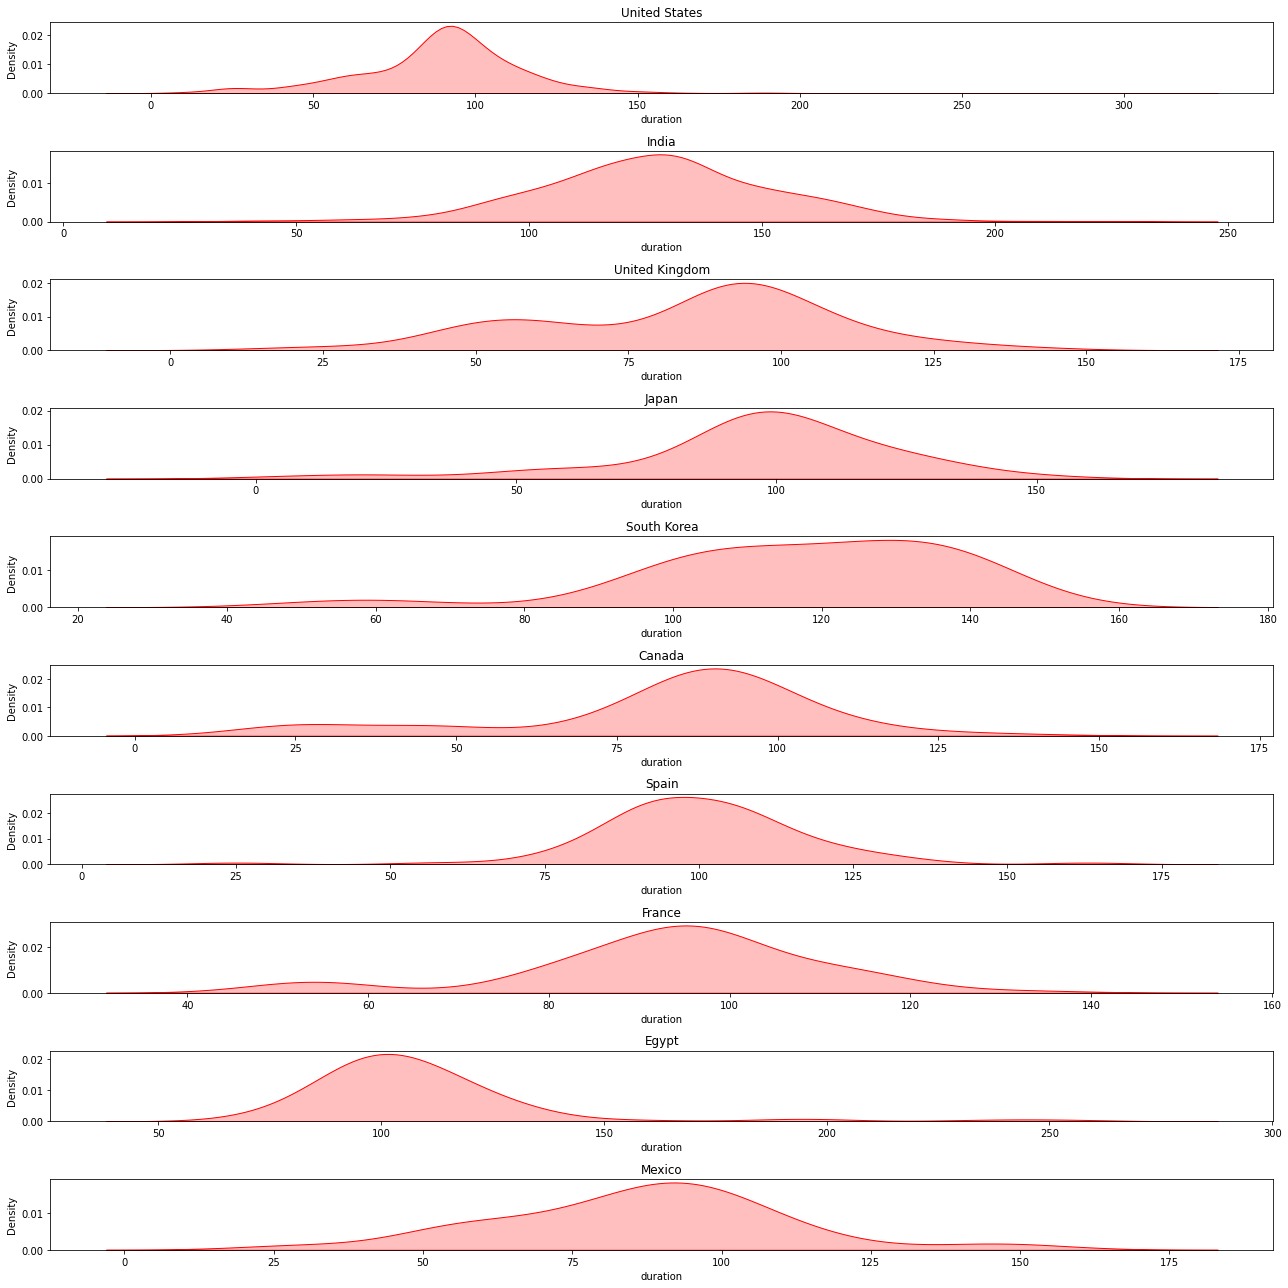

In [53]:
import seaborn as sns

countries = data['country'].value_counts()
top_countries = countries[:10].index.to_list()
f, axes = plt.subplots(10,1, figsize=(18,18))

print(top_countries)
for i in range(len(top_countries)):
  for j in range(1):
    duration = data.loc[(data.country==str(top_countries[i]))&(data.type=='Movie')].duration[:]
    duration = duration.apply(lambda x: int(x.strip(' minSeason ')))
    axes[i].set_title(top_countries[i])
    sns.kdeplot(data=duration, Label="Movie Duration", color='r', ax=axes[i], fill=True, legend=True)
    plt.tight_layout()

Dari grafik dapat dilihat bahwa durasi antara 75 hingga 100 menit memiliki penonton yang banyak.